## Bloco 2 - aprendizado de máquina

<a id='sum'>Sumário</a>

1. [Treino, teste e baseline](#treino)
2. [k vizinhos mais próximos (k-NN)](#vizinhos)
3. [Regressão linear](#linear)
4. [Árvore de decisão](#decisao)
5. [Floresta aleatória](#floresta)
6. [Comparando os desempenhos dos modelos de regressão](#comparacao)
7. [Classificação](#class)


**Objetivo**
<br>Em poucas palavras, o objetivo do  segundo bloco consiste em formular modelos que sejam capazes de trabalhar com os nossos dados a partir de diferentes algoritmos. Tendo o resultado dessas manipulações, os analisaremos e compararemos os modelos. Finalmente, buscamos encontrar o modelo que mais se adequa aos objetivos do projeto.

<hr>

### <a id="treino">Tarefa 1 - Treino, teste e baseline

Antes de mais nada, apenas por convenção e consistência dos dados analisados, estamos utilizando as seguintes `seeds` para as análises feitas:
- ***seed:* 666** para os dados referentes ao dataset que utiliza o arquivo ***data.csv*** 
- ***seed:* 777** para os dados referentes ao dataset que utiliza o arquivo ***data_artigo.csv*** 

[Voltar para o sumário](#sum)

Importando os dados dos arquivos:

In [1]:
# Importando as bibliotecas e módulos a serem utilizados para a realização do treino, teste e baseline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv('data.csv') #Importando o dataframe do arquivo "data.csv" (o arquivo sem os dados do artigo)
df_data = df_data.drop("Unnamed: 0",axis=1)

In [3]:
df_data_art = pd.read_csv('data_artigo.csv') #Importando o dataframe do arquivo "data_artigo.csv"
df_data_art = df_data_art.drop("Unnamed: 0",axis=1)

In [4]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data.csv"
df_data['Idade']=df_data['Idade'].replace('20-29',random.randint(20, 29))
df_data['Idade']=df_data['Idade'].replace('30-39',random.randint(30, 39))
df_data['Idade']=df_data['Idade'].replace('40-49',random.randint(40, 49))
df_data['Idade']=df_data['Idade'].replace('50-59',random.randint(50, 59))
df_data['Idade']=df_data['Idade'].replace('60-69',random.randint(60, 69))
df_data['Idade']=df_data['Idade'].replace('70-79',random.randint(70, 79))
df_data

,Amostra,Sexo,Categoria Idade,Idade,URM1,TRAPPC3,GTF3C5,USP4,SCYL1,MLF2,...,RTFDC1,MTMR14,MANBAL,MRPL9,GPS1,GTF2F1,SMPD4,NRBP1,DNAJB12,SUPT5H
0,GTEX-U8XE,male,Jovem,35,0.970511,0.916667,0.706498,0.825296,0.943988,0.915365,...,0.810352,0.620929,0.731743,0.965841,0.830299,0.712460,0.889464,0.847246,0.717243,0.864087
1,GTEX-UPJH,male,Adulto,56,0.668665,0.724498,0.855626,1.000000,0.814403,0.777995,...,0.843942,1.000000,0.821252,0.669403,0.862361,0.765743,0.917921,1.000000,0.882019,0.871705
2,GTEX-UPK5,male,Adulto,42,0.765044,0.891566,0.641997,0.779974,0.665592,0.738281,...,0.869037,0.802774,0.980705,0.990600,0.564181,0.765877,0.690263,0.776425,0.791548,0.700210
3,GTEX-V1D1,male,Adulto,56,0.695756,0.547992,0.632330,0.924374,0.575239,0.707031,...,0.592602,0.774729,0.699183,0.706209,0.623605,0.516550,0.806444,0.662126,0.736812,0.725469
4,GTEX-VJYA,male,Idoso,63,0.574682,0.795382,0.503962,0.911989,0.711825,0.703125,...,0.743955,0.808203,0.802090,0.998014,0.601762,0.598762,0.782455,0.696135,0.595576,0.682169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,GTEX-ZYVF,female,Adulto,56,0.621434,0.841566,0.654834,0.779710,0.571905,0.693359,...,0.749706,0.637817,0.738845,0.560572,0.590957,0.616523,0.637347,0.698454,0.700794,0.709131
106,GTEX-ZYW4,male,Idoso,63,0.846320,0.833534,0.655784,0.621080,0.802956,0.835286,...,0.830741,0.783172,0.946804,0.734278,0.729771,0.822255,0.687912,0.822222,0.886841,0.665130
107,GTEX-ZYY3,female,Idoso,63,0.723328,0.796185,0.860539,0.756258,0.531007,0.571289,...,0.572082,0.701448,0.514538,0.804449,0.648268,0.560549,0.853010,0.704058,0.745037,0.848852
108,GTEX-ZZ64,male,Jovem,25,0.713498,0.731124,0.688431,0.855863,0.870305,0.915365,...,0.817671,0.783172,0.808790,0.722494,0.756665,0.994483,0.765522,0.869179,0.891378,0.833317


In [5]:
# Substituindo os intervalos dos valores das idades para a média, a fim de obter os dados em valores numéricos - para o "data_artigo.csv"
df_data_art['Idade']=df_data_art['Idade'].replace('20-29',random.randint(20, 29))
df_data_art['Idade']=df_data_art['Idade'].replace('30-39',random.randint(30, 39))
df_data_art['Idade']=df_data_art['Idade'].replace('40-49',random.randint(40, 49))
df_data_art['Idade']=df_data_art['Idade'].replace('50-59',random.randint(50, 59))
df_data_art['Idade']=df_data_art['Idade'].replace('60-69',random.randint(60, 69))
df_data_art['Idade']=df_data_art['Idade'].replace('70-79',random.randint(70, 79))
df_data_art

,Amostra,Sexo,Categoria Idade,Idade,MMP1,MMP3,MMP9,MMP11,MMP24,MMP27,BARD1,BCL7C,CLPTM1L,TERT,CDKN1A
0,GTEX-U8XE,male,Jovem,35,0.415301,1.959855e-02,0.609227,8.821049e-02,0.000014,0.851644,0.354668,0.472280,0.910613,0.456960,0.770863
1,GTEX-UPJH,male,Adulto,52,0.000005,7.996788e-03,0.159422,3.882611e-02,0.503206,0.168324,0.491779,0.604135,0.656658,0.020528,0.301729
2,GTEX-UPK5,male,Adulto,49,0.000000,7.149739e-03,0.000003,4.746163e-02,0.000003,0.310585,0.215032,0.536110,0.690726,0.000000,0.230042
3,GTEX-V1D1,male,Adulto,52,0.000000,0.000000e+00,0.062979,1.321471e-06,0.000034,0.523176,0.488843,0.430027,0.459522,0.183716,0.266740
4,GTEX-VJYA,male,Idoso,65,0.000000,1.969892e-02,0.329350,3.710575e-02,0.444207,0.744908,0.250793,0.411447,0.618432,0.223564,0.134728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,GTEX-ZYVF,female,Adulto,52,0.000024,1.819350e-07,0.142913,2.020577e-02,0.000032,0.095750,0.363183,0.539107,0.547407,0.106089,0.242711
106,GTEX-ZYW4,male,Idoso,65,0.000023,5.150542e-03,0.168872,5.422500e-02,0.000013,0.103609,0.250000,0.706623,0.785079,0.312058,0.371003
107,GTEX-ZYY3,female,Idoso,65,0.000003,2.070253e-07,0.071373,8.591668e-07,0.000021,0.000006,0.754844,0.472580,0.506640,0.312230,0.363262
108,GTEX-ZZ64,male,Jovem,25,0.000001,3.753111e-02,0.185770,2.604149e-02,0.000039,0.289014,0.354081,0.503746,0.718097,0.037088,0.377036


<hr>

#### Dividindo o dataset em treino e teste

In [6]:
# Para o dataframe do "data.csv"
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 10

indices = df_data.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE
)

df_treino = df_data.loc[indices_treino]
df_teste = df_data.loc[indices_teste]

In [7]:
# Para o dataframe do "data_artigo.csv"
from sklearn.model_selection import train_test_split

TAMANHO_TESTE_art = 10

indices_art = df_data_art.index
indices_treino_art, indices_teste_art = train_test_split(
    indices_art, test_size=TAMANHO_TESTE_art
)

df_art_treino = df_data_art.loc[indices_treino_art]
df_art_teste = df_data_art.loc[indices_teste_art]

--- 

#### Criando o modelo preditivo de base (baseline)

- Para o dataframe do arquivo ***"data.csv"***:

In [8]:
df_data.columns.values

array(['Amostra', 'Sexo', 'Categoria Idade', 'Idade', 'URM1', 'TRAPPC3',
       'GTF3C5', 'USP4', 'SCYL1', 'MLF2', 'DGCR14', 'ARAF', 'TCF25',
       'HDAC3', 'RTFDC1', 'MTMR14', 'MANBAL', 'MRPL9', 'GPS1', 'GTF2F1',
       'SMPD4', 'NRBP1', 'DNAJB12', 'SUPT5H'], dtype=object)

> Queremos apenas os genes como features, então selecionaremos da quarta coluna para frente. Sendo assim, solicitamos ao Python que ele pegue os valores das colunas do nosso DataFrame, a partir do nosso primeiro gene.

In [9]:
TAMANHO_TESTE = 10
SEMENTE_ALEATORIA = 666
FEATURES = df_data.columns.values[4:]
TARGET = ["Idade"]

indices_data = df_data.index
indices_treino_data, indices_teste_data = train_test_split(
    indices_data, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_data = df_data.loc[indices_treino_data]
df_teste_data = df_data.loc[indices_teste_data]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

Treinando o modelo:

In [10]:
from sklearn.dummy import DummyRegressor

# Criando o modelo
modelo_baseline = DummyRegressor()

# Treinando o modelo
modelo_baseline.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste_data)
print(previsao)

[50.61 50.61 50.61 50.61 50.61 50.61 50.61 50.61 50.61 50.61]


####

- Para o dataframe do arquivo ***"data_artigo.csv"***:

In [11]:
df_data_art.columns.values

array(['Amostra', 'Sexo', 'Categoria Idade', 'Idade', 'MMP1', 'MMP3',
       'MMP9', 'MMP11', 'MMP24', 'MMP27', 'BARD1', 'BCL7C', 'CLPTM1L',
       'TERT', 'CDKN1A'], dtype=object)

> Novamente, apenas desejamos os genes como as features, então trabalharemos a partir da quarta coluna para frente.

In [12]:
TAMANHO_TESTE_art = 10
SEMENTE_ALEATORIA_art = 777
FEATURES_art = df_data_art.columns.values[4:]
TARGET_art = ["Idade"]

indices_data_art = df_data_art.index
indices_treino_data_art, indices_teste_data_art = train_test_split(
    indices_data_art, test_size=TAMANHO_TESTE_art, random_state=SEMENTE_ALEATORIA_art
)

df_treino_data_art = df_data_art.loc[indices_treino_data_art]
df_teste_data_art = df_data_art.loc[indices_teste_data_art]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

Treinando o modelo (para o ***data_artigo.csv***):

In [13]:
from sklearn.dummy import DummyRegressor

# Criando o modelo
modelo_baseline_art = DummyRegressor()

# Treinando o modelo
modelo_baseline_art.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art = modelo_baseline_art.predict(X_teste_data_art)
print(previsao_art)

[50.94 50.94 50.94 50.94 50.94 50.94 50.94 50.94 50.94 50.94]


###

Agora, precisamos testar se o nosso modelo realmente é bom, e para isso, precisamos utilizar métricas - a raiz quadrada do erro quadrático médio (RMSE, root mean squared error) é um bom método para determinar a eficácia do algoritmo.

- Testando para o dataframe do arquivo ***"data.csv"***:

O RMSE do modelo baseline foi de 14.327529445092757 anos.


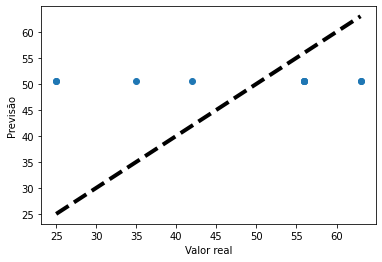

In [14]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data
y_previsao = modelo_baseline.predict(X_teste_data)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} anos.")

fig, ax = plt.subplots()
ax.scatter(y_verdadeiro, y_previsao)
ax.plot([y_verdadeiro.min(), y_verdadeiro.max()], [y_verdadeiro.min(), y_verdadeiro.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

- Testando para o dataframe do arquivo ***"data_artigo.csv"***:

In [15]:
y_verdadeiro_art = y_teste_data_art
y_previsao_art = modelo_baseline.predict(X_teste_data_art)

RMSE_art = mean_squared_error(y_verdadeiro_art, y_previsao_art, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE_art} anos.")

O RMSE do modelo baseline foi de 9.379344326763997 anos.


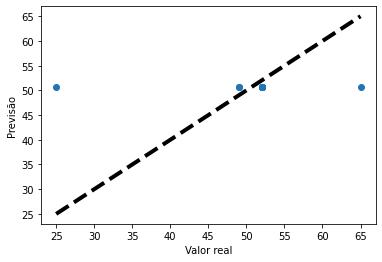

In [16]:
ig, ax = plt.subplots()
ax.scatter(y_verdadeiro_art, y_previsao_art)
ax.plot([y_verdadeiro_art.min(), y_verdadeiro_art.max()], [y_verdadeiro_art.min(), y_verdadeiro_art.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

---

### <a id="vizinhos">Tarefa 2 - k vizinhos mais próximos (k-NN)


[Voltar para o sumário](#sum)

In [17]:
# Relembrando o nome das variáveis do data.csv
# observe que usamos o .values aqui, pois queremos apenas os valores
# X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
# y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
# X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
# y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

# Relembrando o nome das variáveis do data.art.cvs
# observe que usamos o .values aqui, pois queremos apenas os valores
# X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
# y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
# X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
# y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

Proponho seguirmos a mesma ordem de raciocínio utilizada nos itens anteriores; 

1- Treinar;

2- Testar e produzir o RMSE para ver se é um bom método;

3- Determinando a quantidade ideal de vizinhos (Testando os Hiperparâmetros);

4- Posteriormente comparar entre os dataframes (data.csv e data_artigo.csv);

5- Comparar o RMSE com os Hiperparâmetros; (Produzindo gráficos);

- 1 - Treinando o K-NN para o dataframe do arquivo ***"data.csv"***;

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste_data)
print(previsao)

[[44.2]
 [45.6]
 [58.8]
 [46.2]
 [48.4]
 [49. ]
 [53.2]
 [56. ]
 [51.8]
 [53.2]]


- 2 - Testando o K-NN para o dataframe do arquivo ***"data.csv"***;

In [19]:
from sklearn.metrics import mean_squared_error
#aqui estamos testando o modelo produzindo uma previsão e medindo o RMSE da previsão
y_verdadeiro1 = y_teste_data
y_previsao1 = modelo_knn.predict(X_teste_data)

RMSE = mean_squared_error(y_verdadeiro1, y_previsao1, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} anos.")

O RMSE do modelo k-NN foi de 13.045918902093485 anos.


- 3- Determinando a quantidade ideal de vizinhos para o ***"data.csv"*** (Testando os Hiperparâmetros);

In [20]:
NUM_VIZINHOS = [1, 5, 10, 25, 30, 100]
#Aqui vamos testar valores diferentes de k (além do padrão de 5), para ver qual seria o melhor número de vizinhos para produzir o melhor RMSE 
for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino_data, y_treino_data)

    y_verdadeiro1 = y_teste_data
    y_previsao1 = modelo_knn.predict(X_teste_data)
    RMSE = mean_squared_error(y_verdadeiro1, y_previsao1, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} anos.")

O RMSE do modelo k-NN usando k=1 foi de 18.283872675120005 anos.
O RMSE do modelo k-NN usando k=5 foi de 13.045918902093485 anos.
O RMSE do modelo k-NN usando k=10 foi de 13.349794005901364 anos.
O RMSE do modelo k-NN usando k=25 foi de 13.81305469474439 anos.
O RMSE do modelo k-NN usando k=30 foi de 13.912572251983695 anos.
O RMSE do modelo k-NN usando k=100 foi de 14.327529445092757 anos.


- 1 - Treinando o K-NN para o dataframe do arquivo ***"data_artigo.csv"***;

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art = modelo_knn.predict(X_teste_data_art)
print(previsao_art)

[[51.2]
 [56.6]
 [51.4]
 [56. ]
 [52.8]
 [51.8]
 [53.8]
 [44.6]
 [50. ]
 [52.8]]


- 2 - Testando o K-NN para o dataframe do arquivo ***"data_artigo.csv"***;

In [22]:
from sklearn.metrics import mean_squared_error
#aqui estamos testando o modelo produzindo uma previsão e medindo o RMSE da previsão
y_verdadeiro2 = y_teste_data_art
y_previsao2 = modelo_knn.predict(X_teste_data_art)

RMSE = mean_squared_error(y_verdadeiro2, y_previsao2, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} anos.")

O RMSE do modelo k-NN foi de 11.091798772065783 anos.


- 3- Determinando a quantidade ideal de vizinhos para o ***"data_artigo.csv"*** (Testando os Hiperparâmetros);

In [23]:
NUM_VIZINHOS = [1, 5, 10, 25, 30, 100]
#Aqui vamos testar valores diferentes de k (além do padrão de 5), para ver qual seria o melhor número de vizinhos para produzir o melhor RMSE 
for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino_data_art, y_treino_data_art)

    y_verdadeiro2 = y_teste_data_art
    y_previsao2 = modelo_knn.predict(X_teste_data_art)
    RMSE = mean_squared_error(y_verdadeiro2, y_previsao2, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} anos.")

O RMSE do modelo k-NN usando k=1 foi de 12.521980673998822 anos.
O RMSE do modelo k-NN usando k=5 foi de 11.091798772065783 anos.
O RMSE do modelo k-NN usando k=10 foi de 10.162578412981619 anos.
O RMSE do modelo k-NN usando k=25 foi de 9.259218109538192 anos.
O RMSE do modelo k-NN usando k=30 foi de 9.307601433475998 anos.
O RMSE do modelo k-NN usando k=100 foi de 9.406572170562452 anos.


- 4- Posteriormente comparar entre os dataframes (data.csv e data_artigo.csv)

A diferença entre os dataframes continua sendo baixa data.csv = 13.6 anos e o data_artivo.csv = 11.6 anos.

O melhor número de vizinhos para data.csv = 5 e para o data_artivo.csv = 30 (considerando o melhor RMSE).

- 5- Comparar o RMSE com os Hiperparâmetros;

In [24]:
#Aqui vamos plotar um gráfico de RMSE x Número de vizinhos para confirmar que o melhor número de vizinhos achado anteriormente é realmente o melhor
def kn_plot(X_treino_data, y_treino_data, X_teste_data, y_teste_data, n=5):    
    import matplotlib.pyplot as plt        
    resultado_RMSE = []    
    testes = [i for i in range(1, n) if i % 2 != 0] #Estamos escolhendo os números, impares para produzir os gráficos        
    for k in testes:        
        model = KNeighborsRegressor(n_neighbors=k)        
        model.fit(X_treino_data, y_treino_data)        
        previsao1 = model.predict(X_teste_data)        
        rmse = mean_squared_error(y_teste_data, previsao1, squared=False)        
        resultado_RMSE.append(rmse)       
    plt.xlabel('Número de vizinhos')    
    plt.ylabel('RMSE')
    plt.plot(testes, resultado_RMSE)

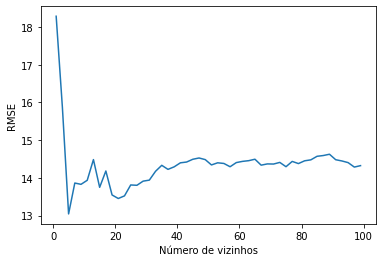

In [25]:
# ***"data.csv"***
kn_plot(X_treino_data, y_treino_data, X_teste_data, y_teste_data, n=100)

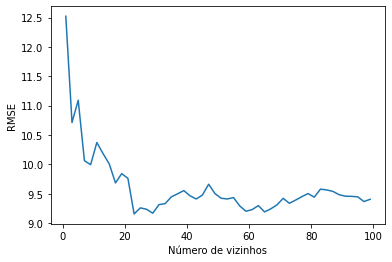

In [26]:
# ***"data_artigo.csv"***
kn_plot(X_treino_data_art, y_treino_data_art, X_teste_data_art, y_teste_data_art, n=100)

- 5 - Comparar o RMSE com os Hiperparâmetros; 

Conclusão: Conforme comprovado na 4, aqui temos graficamente que os valores para data.csv = 5 e para o data_artivo.csv = 30 são os melhores valores de vizinhos que podemos encontrar considerando o RMSE.

Temos 2 pontos mínimos globais nos dois gráficos: Isso levantou um questionamento pelo método utilizado pela KNN para escolher o melhor número de vizinhos. Por padrão o KNN utiliza a distância euclidiana e ela apresenta alguns problemas conforme o número de dimensões crescem e no nosso modelo nós temos 10 dimensões, mas mesmo que tenhamos duas opções de mínimos globais é melhor escolher o primeiro mínimo global que apareceu no gráfico, ou seja, para data.csv = 5 e para o data_artivo.csv = 31 (pois excluímos os números pares).

OBS: uma solução para a existência desses dois pontos mínimos globais eficientes seria mudar o método para medir a distância entre os vizinhos, por exemplo, poderíamos utilizar o método da distância manhattan.

Comentário do professor Daniel: Diferentemente dos outros grupos, o nosso modelo (KNN) deve reagir melhor com mais dados para ter como vizinhos para escolher de forma mais eficiente o local do novo dado, pois nosso projeto é computacionalmente mais complexo.

---

### <a id="linear">Tarefa 3 - Regressão Linear

[Voltar para o sumário](#sum)

#### Treinando um modelo linear para os datasets:

- Treinando para o dataframe do arquivo ***"data.csv"***: 

In [27]:
from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear_data = LinearRegression()

# treina o modelo
modelo_linear_data.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao_data = modelo_linear_data.predict(X_teste_data)
print(previsao_data)

[[48.68804466]
 [55.68630246]
 [56.10998567]
 [45.10384341]
 [43.3802607 ]
 [60.63517766]
 [48.83056194]
 [54.3302675 ]
 [52.83708692]
 [55.14089899]]


In [28]:
y_verdadeiro_data = y_teste_data
y_previsao_data = modelo_linear_data.predict(X_teste_data)

RMSE_data2 = mean_squared_error(y_verdadeiro_data, y_previsao_data, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_data2} anos")

O RMSE do modelo linear foi de 17.392842874292885 anos


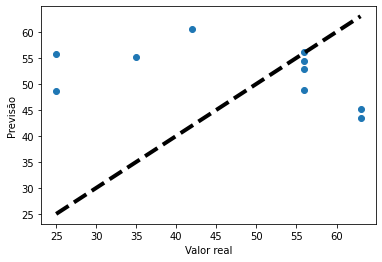

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_verdadeiro_data, y_previsao_data)
ax.plot([y_verdadeiro_data.min(), y_verdadeiro_data.max()], [y_verdadeiro_data.min(), y_verdadeiro_data.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

> O valor de RMSE do caso linear (no caso dos genes identificados como relevantes no bloco anterior) foi maior do que aquele obtido a partir da previsão de baseline, ou seja, obtivemos uma piora na performance de predição. Normalmente, o RMSE do modelo linear demonstraria um valor menor em comparação ao valor de RMSE do modelo baseline, implicando em uma melhora, mas curiosamente, o caso oposto ocorreu. Isso pode ser por conta dos valores quais estamos trabalhando no o *dataset* escolhido. 

- Treinando para o dataframe do arquivo ***"data_artigo.csv"***: 

In [30]:
# cria o modelo
modelo_linear_art = LinearRegression()

# treina o modelo
modelo_linear_art.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao_art2 = modelo_linear_art.predict(X_teste_data_art)
print(previsao_art2)

[[54.18139477]
 [54.30403899]
 [49.07843573]
 [49.36306758]
 [51.28434027]
 [50.4619893 ]
 [52.82185574]
 [50.19386057]
 [53.44940319]
 [51.28309518]]


In [31]:
y_verdadeiro_art2 = y_teste_data_art
y_previsao_art2 = modelo_linear_art.predict(X_teste_data_art)

RMSE_art2 = mean_squared_error(y_verdadeiro_art2, y_previsao_art2, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_art2} anos")

O RMSE do modelo linear foi de 9.187703163029754 anos


> Já nesse caso, obtivemos o resultado normalmente esperado, no qual um valor menor de RMSE foi observado no caso do modelo linear (9.496874730058186 anos), enquanto o RMSE do modelo baseline teve um valor maior (10.205880657738458 anos.). Portanto, no caso do dataset contendo os genes que possuem sua expressão modificada em função do tempo confirmadada de acordo com a literatura, o modelo linear se prova um pouco mais eficaz.

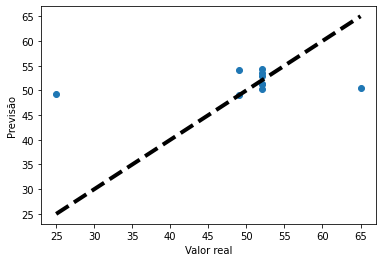

In [32]:
ig, ax = plt.subplots()
ax.scatter(y_verdadeiro_art2, y_previsao_art2)
ax.plot([y_verdadeiro_art2.min(), y_verdadeiro_art2.max()], [y_verdadeiro_art2.min(), y_verdadeiro_art2.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Previsão')
plt.show()

###
#### Normalizando os dados
Vamos utilizar a normalização pelo mínimo e máximo (função `MinMaxScaler`). </br>
<u>A normalização nesse caso só foi realizada como um teste, visto que nossos dados originais já se encontravam normalizados.</u>

- Para o dataframe do arquivo ***"data.csv"***: 

In [33]:
from sklearn.preprocessing import MinMaxScaler

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino_data)
normalizador_y.fit(y_treino_data)

MinMaxScaler()

In [34]:
# Ajustando o modelo:

from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear_dn = LinearRegression()

# treina o modelo
modelo_linear_dn.fit(
    normalizador_x.transform(X_treino_data),
    normalizador_y.transform(y_treino_data),
)

# realiza uma previsão usando o modelo treinado
previsao1 = modelo_linear_dn.predict(normalizador_x.transform(X_treino_data))
previsao1 = normalizador_y.inverse_transform(previsao1)
print(previsao1)

[[55.20046406]
 [50.43767824]
 [44.12942358]
 [55.67703209]
 [46.35960876]
 [45.8264292 ]
 [53.91744297]
 [52.80750546]
 [59.72728225]
 [47.99585275]
 [56.19708101]
 [52.83508308]
 [53.40990011]
 [42.17392175]
 [50.19825461]
 [61.10680784]
 [52.7080271 ]
 [51.99718541]
 [54.03103906]
 [48.15500159]
 [61.13451386]
 [65.17006645]
 [50.25640119]
 [50.45724099]
 [57.37536787]
 [53.91095435]
 [49.91397018]
 [47.64149372]
 [48.57356379]
 [54.81209859]
 [44.87068628]
 [45.3195411 ]
 [55.9898328 ]
 [56.22746607]
 [44.66061402]
 [38.55859297]
 [52.65916777]
 [50.70670083]
 [50.4676195 ]
 [56.02326285]
 [46.79373062]
 [43.0466345 ]
 [43.1317485 ]
 [50.57023448]
 [48.46509656]
 [44.70316437]
 [49.85202291]
 [55.22645889]
 [48.46272191]
 [47.26903157]
 [47.54316199]
 [60.61157736]
 [46.83085481]
 [49.90772427]
 [43.51711933]
 [55.85692747]
 [61.04471668]
 [48.44239783]
 [57.5176313 ]
 [46.65920981]
 [50.51175166]
 [48.24178613]
 [47.11731303]
 [53.57573904]
 [59.05348351]
 [48.34099859]
 [45.20346

In [35]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data
y_previsao_n = modelo_linear_dn.predict(normalizador_x.transform(X_teste_data))
y_previsao_n = normalizador_y.inverse_transform(y_previsao_data)

RMSE_dn = mean_squared_error(y_verdadeiro, y_previsao_n, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_dn} anos.")

O RMSE do modelo linear foi de 1966.467711760821 anos.


###
- Para o dataframe do arquivo ***"data_artigo.csv"***:

In [36]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino_data_art)
normalizador_y.fit(y_treino_data_art)

MinMaxScaler()

In [37]:
# Ajustando o modelo:

# cria o modelo
modelo_linear_artn = LinearRegression()

# treina o modelo
modelo_linear_artn.fit(
    normalizador_x.transform(X_treino_data_art),
    normalizador_y.transform(y_treino_data_art),
)

# realiza uma previsão usando o modelo treinado
previsao2 = modelo_linear_artn.predict(normalizador_x.transform(X_treino_data_art))
previsao2 = normalizador_y.inverse_transform(previsao2)
print(previsao2)

[[50.10766074]
 [48.20227138]
 [49.31370289]
 [52.81664961]
 [51.08377022]
 [51.19101837]
 [48.77963216]
 [49.66927908]
 [56.43539992]
 [48.19005086]
 [50.02816441]
 [43.63537675]
 [55.34089837]
 [51.22844113]
 [50.75136222]
 [51.94750465]
 [53.80091592]
 [48.54513009]
 [49.46528781]
 [50.46702001]
 [51.05005408]
 [51.77983075]
 [49.02868381]
 [48.91690707]
 [45.24722683]
 [49.37579761]
 [58.0138299 ]
 [50.05380374]
 [52.57451297]
 [52.54947136]
 [53.79554416]
 [51.86113321]
 [49.81484754]
 [50.47999589]
 [53.79910615]
 [52.97292747]
 [50.16660811]
 [51.58729739]
 [51.95091428]
 [48.9717203 ]
 [53.16804618]
 [50.34737195]
 [50.16374514]
 [49.84290077]
 [51.38194669]
 [50.97119955]
 [50.39243076]
 [48.94694968]
 [53.06890913]
 [51.77421424]
 [53.89596754]
 [51.42113922]
 [52.28232207]
 [49.12314092]
 [53.08034916]
 [52.80609643]
 [46.32273396]
 [48.3387228 ]
 [45.65839515]
 [50.26690254]
 [45.20373085]
 [49.33463273]
 [49.73244706]
 [52.90736737]
 [51.9992362 ]
 [51.77713279]
 [50.54843

In [38]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data_art
y_previsao_artn = modelo_linear_artn.predict(normalizador_x.transform(X_teste_data_art))
y_previsao_artn = normalizador_y.inverse_transform(y_previsao_artn)

RMSE_artn = mean_squared_error(y_verdadeiro, y_previsao_artn, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE_artn} anos.")

O RMSE do modelo linear foi de 9.187703163029756 anos.


---

### <a id="decisao">Tarefa 4 - Árvore de Decisão

[Voltar para o sumário](#sum)

Começando com uma breve introdução, o algoritmo consiste basicamente em uma lógica de grafos direcionais, tomando decisões a partir da checagem da informação do tipo de vértice no qual a instância se encontra, sendo as categorias de vértice retratadas abaixo, de acordo com o notebook ***"b2a2.1 - arvore de decisao"*** disponibilizado para nós pelos professores:

-   *Vértice raiz*: é um vértice cauda que é ligado a dois vértices cabeça. Em outras palavras, existem duas setas que saem dele e nenhuma seta que chega nele. (Ou seja, é comparável a uma casa inicial de um jogo de tabuleiro).

-   *Vértice de decisão*: é um vértice que atua como cabeça para outro vértice e como cauda para dois outros vértices cabeça. Em outras palavras, existe uma seta que chega nele e duas setas que saem dele.

-   *Vértice folha*: é um vértice cabeça de um outro vértice. Em outras palavras, existe uma seta que chega nele e nenhuma seta que sai dele. (Como se fossem os "dead-ends" de uma via)

Ao navegar por uma árvore de decisão, a instância sempre iniciará no vértice raiz. O vértice raiz e os vértices de decisão possuem o que são chamados de *condicionais*, enquanto os vértices folhas possuem *valores de resposta*. Sabendo disso, a instâcia checará o condicional presente em um determinado vértice, sendo que a resposta ao condicional é sempre binária, ou seja, `True` ou `False`, sendo assim, caso o retorno for `True`, a seta da esquerda será seguida; já caso for `False`, seguirá para a seta da direita. O mesmo procedimento é repetido até que eventualmente um vértice folha for atingido. <br>

####
Com os dados já previamente importados no notebook, vamos partir diretamente para o treinamento dos modelos utilizando ambos os *datasets*, fazendo uso do algoritmo da árvore de decisão, também pelo `scikit-learn`:

- Para o dataframe do arquivo ***"data.csv"***: 

In [39]:
# Relembrando as variáveis:
# X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
# y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
# X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
# y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

In [40]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt_data = DecisionTreeRegressor(random_state=666)

# treina o modelo
modelo_dt_data.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt_data.predict(X_teste_data)
print(previsao)

[25. 25. 63. 56. 35. 63. 42. 25. 42. 63.]


In [41]:
# Assim como feito nos outros algoritmos de treinamento, aqui calcularemos o RMSE
from sklearn.metrics import mean_squared_error

y_verdadeiro_dt_data = y_teste_data
y_previsao_dt_data = modelo_dt_data.predict(X_teste_data)

RMSE_dt_data = mean_squared_error(y_verdadeiro_dt_data, y_previsao_dt_data, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_dt_data} anos")

O RMSE do modelo árvore de decisão foi de 18.601075237738275 anos


> A partir do valor de RMSE encontrado através da aplicação desse método, é possível inferir que esse método não aparenta ser tão eficaz em relação aos outros testados previamente, já que aparenta ser maior do que os outros, implicando em uma margem de erro média maior.

####
- Para o dataframe do arquivo ***"data_artigo.csv"***:

In [42]:
# Relembrando as variáveis para o dataset em questão:
# X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
# y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
# X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
# y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

In [43]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt_art = DecisionTreeRegressor(random_state=777)

# treina o modelo
modelo_dt_art.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao2 = modelo_dt_art.predict(X_teste_data_art)
print(previsao2)

[49. 52. 25. 35. 52. 49. 52. 65. 25. 52.]


In [44]:
from sklearn.metrics import mean_squared_error

y_verdadeiro_dt_art = y_teste_data_art
y_previsao_dt_art = modelo_dt_art.predict(X_teste_data_art)

RMSE_dt_art = mean_squared_error(y_verdadeiro_dt_art, y_previsao_dt_art, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_dt_art} anos")

O RMSE do modelo árvore de decisão foi de 13.527749258468683 anos


> Novamente é possível notar que o valor de RMSE obtido a partir do método de árvore de decisão foi maior do que os anteriores até para o dataset com os dados referentes ao arquivo *"dados_artigo.csv"*, implicando em sua menor eficiência.

####
Como o *feature* e certos dados selecionados por nós já se tratavam de dados ordinais e dados categóricos originalmente e já foram tranformados em dados numéricos com sucesso, partiremos diretamente para a definição dos hiperparâmetros.
</br>

### Hiperparâmetros: 
Assim como no modelo de *k-NN*, podemos definir diferentes hiperparâmetros (ou seja, o conjunto de parâmetros definidos em um momento anterior ao treino dos modelos e que não se alteram durante o treino, de acordo com o notebook ***"b2a1.3 - k vizinhos mais proximos"***) a fim de melhorar a performance do modelo. Utilizaremos em primeira instância dois dos dez hiperparâmetros que o `scikit-learn` nos permite configurar, sendo eles (assim como afirmado no notebook ***"b2a2.1 - arvore de decisao"***):

-   `max_leaf_nodes`: que controla o número máximo de *vértices folha* permitidos na árvore de decisão. O valor padrão é `None` que indica para o `scikit-learn` que não existe limite para esse número.

-   `max_depth`: que controla a profundidade máxima da árvore de decisão, ou seja, o número máximo de *vértices de decisão* que podem ser visitados até se atingir um vértice folha. O valor padrão é `None` que indica para o `scikit-learn` que não existe limite para esse número.

- Para o dataframe do arquivo ***"data.csv"***: 

In [45]:
from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt_data = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=666,
    )

    modelo_dt_data.fit(X_treino_data, y_treino_data)

    y_verdadeiro_dt_data = y_teste_data
    y_previsao_dt_data = modelo_dt_data.predict(X_teste_data)
    RMSEdt1 = mean_squared_error(y_verdadeiro_dt_data, y_previsao_dt_data, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSEdt1:.2f} anos."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 18.60 anos.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 10.41 anos.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 17.74 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 11.88 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 10.66 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 11.88 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 14.85 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 10.51 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 15.11 anos.


> A partir da configuração dos diferentes valores de hiperparâmetros, conseguimos notar um valor melhor de RMSE (9,90 anos) para quando utilizamos um `max_leaf_nodes` equivalente a 36 e um valor de `max_depth` equivalente a 3, evidenciando uma certa melhora em performance do modelo.

####
- Para o dataframe do arquivo ***"data_artigo.csv"***

In [46]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt_art = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=777,
    )

    modelo_dt_art.fit(X_treino_data_art, y_treino_data_art)

    y_verdadeiro_dt_data_art = y_teste_data_art
    y_previsao_dt_data_art = modelo_dt_art.predict(X_teste_data_art)
    RMSEdt2 = mean_squared_error(y_verdadeiro_dt_data_art, y_previsao_dt_data_art, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSEdt2:.2f} anos."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 13.53 anos.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 14.34 anos.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 13.64 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 14.39 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 14.34 anos.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 14.39 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 13.40 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 14.34 anos.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 13.40 anos.


> De novo, mesmo considerando agora o dataset referente aos dados do arquivo ***"data_artigo.csv"*** é possível notar, por meio da configuração de diferentes valores de hiperparâmetros, um melhor valor de RMSE (9,82 anos) para quando utilizamos um `max_leaf_nodes` equivalente a 6 e um valor de `max_depth` equivalente a *None*, 3 ou 10, também evidenciando uma certa melhora em performance.

####
### Analisando a árvore de decisão através da plotagem gráfica


Para que possamos compreender melhor os modelos desenvolvidos anteriormente, e os condicionais que estão sendo levados em consideração, vale plotar as árvores de decisão de forma gráfica. </br>
É válido ressaltar também que em ambos os gráficos abaixo, assim como mencionado anteriormente, a seta da esquerda de cada vértice é tomada se a condição for verdadeira (`True`) e a seta da direita é seguida apenas caso a condição for falsa (`False`).

- Para o dataframe do arquivo ***"data.csv"***: 

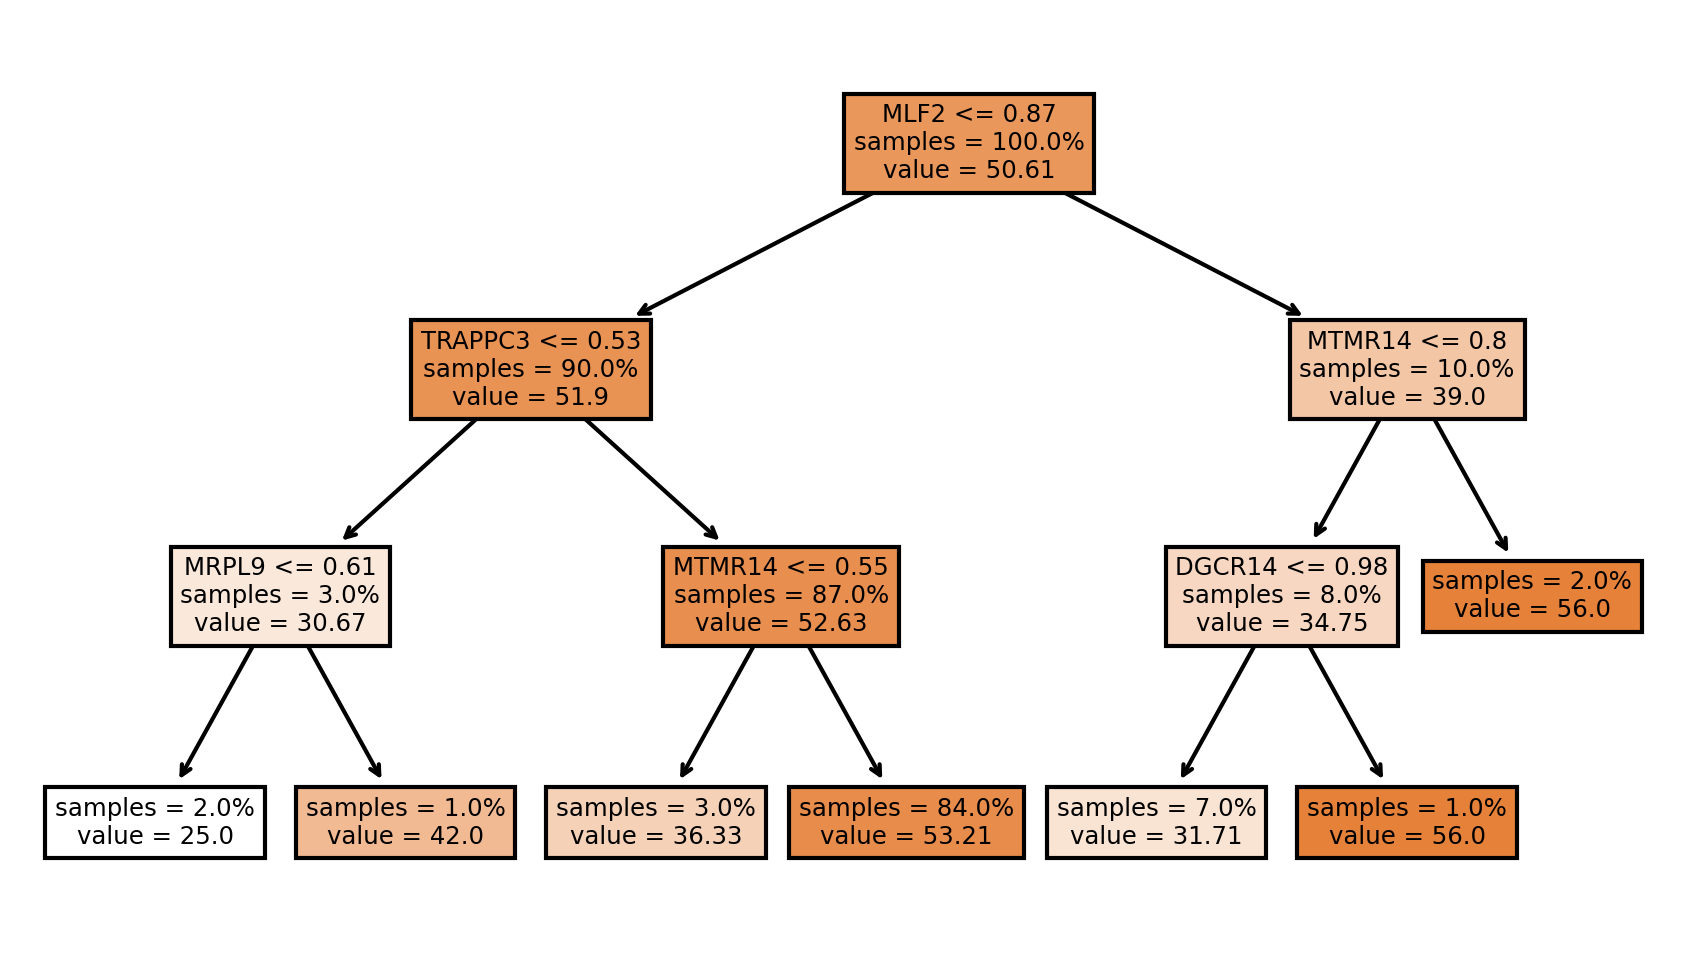

In [47]:
from matplotlib import pyplot as plt
from sklearn import tree

# cria e treina o modelo
modelo_dt_data = DecisionTreeRegressor(
    max_leaf_nodes=36,  # Utilizando o valor de max_leaf_nodes = 36 pois foi o resultado que apresentou um menor valor de RMSE nos hiperparâmetros
    max_depth=3, # Utilizando o valor de max_depth = 3 pois também foi o resultado que apresentou um menor valor de RMSE nos hiperparâmetros
    random_state=666,
)
modelo_dt_data.fit(X_treino_data, y_treino_data)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=300,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt_data,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

> Chegamos à conclusão de que a distribuição um tanto quanto desigual das amostras em termos de porcentagem pode ser por conta das amostras que estamos considerando nos datasets e utilizando para o treinamento do modelo, uma vez que a maior parte das amostras corresponde a indivíduos com idade de 55 anos em média.

<AxesSubplot:>

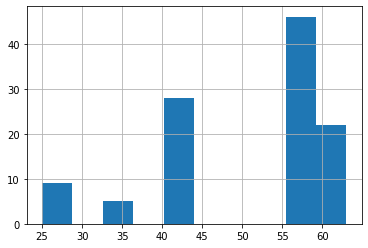

In [48]:
df_data["Idade"].hist()

####
- Para o dataframe do arquivo ***"data_artigo.csv"***: 

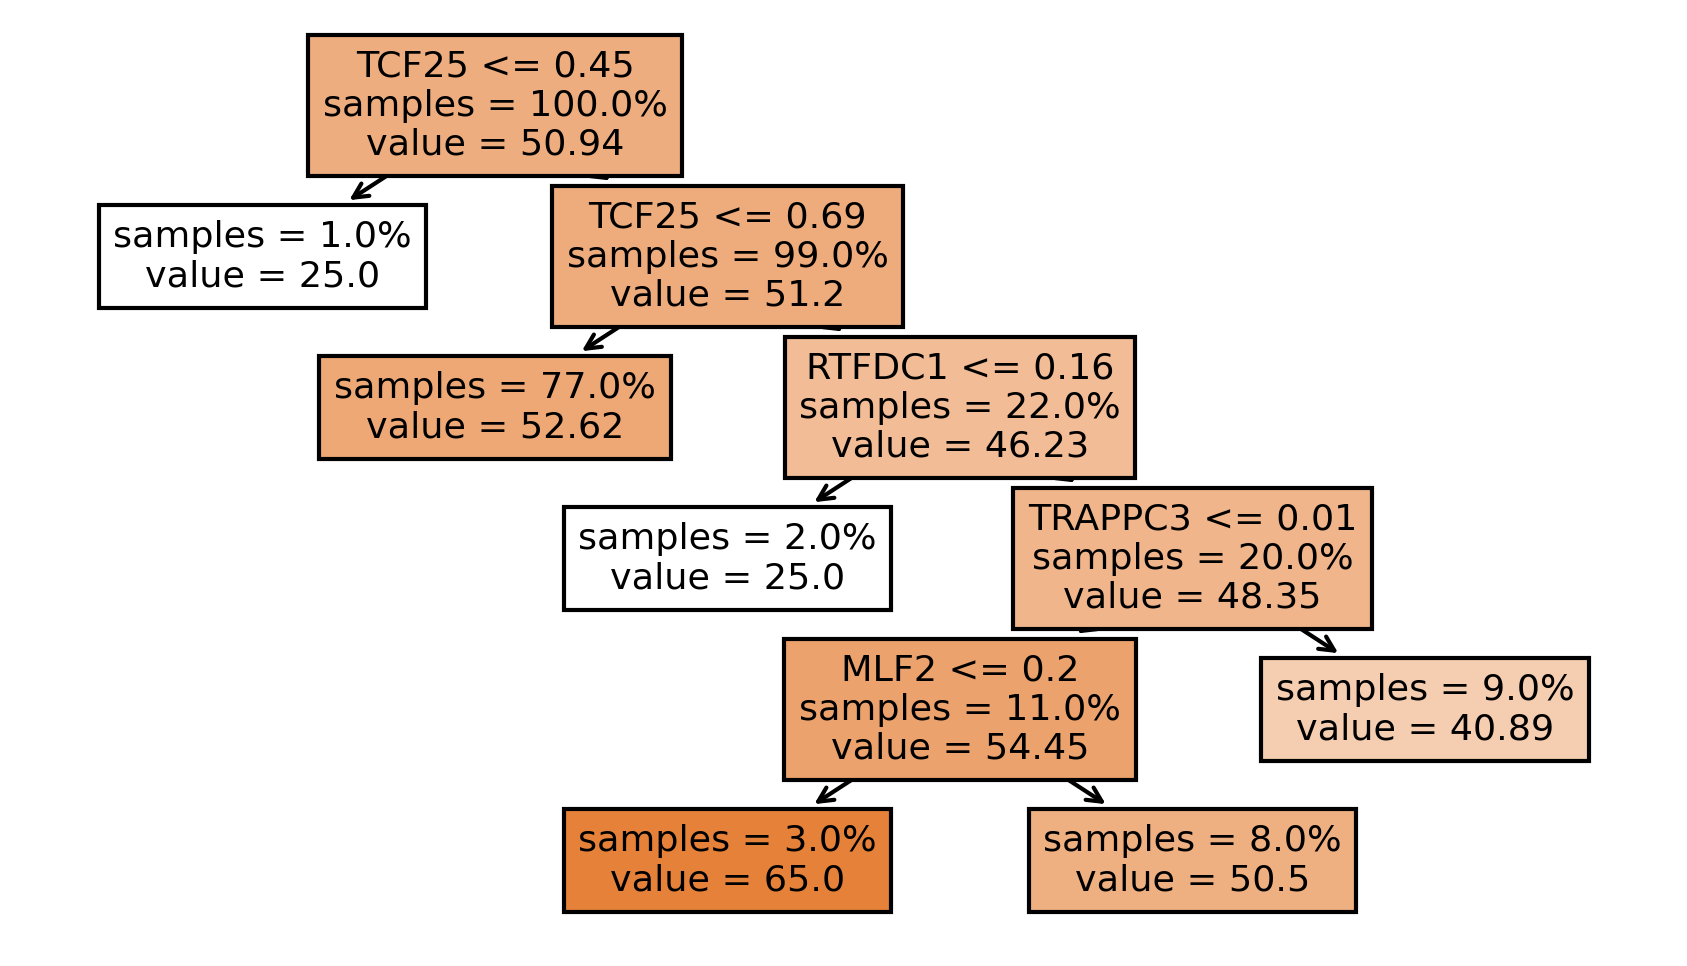

In [49]:
# cria e treina o modelo
modelo_dt_art = DecisionTreeRegressor(
    max_leaf_nodes=6, # Utilizando o valor de max_leaf_nodes = 6 pois foi o resultado que apresentou um menor valor de RMSE nos hiperparâmetros
    max_depth=10, # Utilizando o valor de max_depth = 10 pois foi um dos resultado que apresentou um menor valor de RMSE nos hiperparâmetros
    random_state=777,
)
modelo_dt_art.fit(X_treino_data_art, y_treino_data_art)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=300,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt_art,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

> Mesmo com as distribuições das amostras em termos de porcentagem um pouco menos concentradas em um só vértice folha, ainda apresentam uma grande diferença entre si, de tal forma conluímos que a mesma análise feita para o gráfico anterior também é aplicável neste.

<AxesSubplot:>

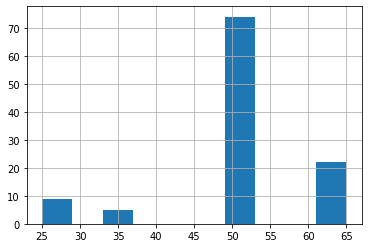

In [50]:
df_data_art["Idade"].hist()

----

### <a id="floresta"> Tarefa 5 - Floresta Aleatória

[Voltar para o sumário](#sum)

Na presente seção, o método de floresta aleatória é aplicado. Para tanto, vale notar que o algoritmo é desenvolvido a partir de árvores de decisão com uma maior flexibilidade, apesar de não apresentar a melhor performance, assim como Josh Starmer afirma ([vídeo do Stat Quest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)).

- Testando para o dataframe do arquivo ***"data.csv"***:

In [51]:
TAMANHO_TESTE = 10
SEMENTE_ALEATORIA = 666
FEATURES = df_data.columns.values[4:]
TARGET = ["Idade"]

indices_data = df_data.index
indices_treino_data, indices_teste_data = train_test_split(
    indices_data, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_data = df_data.loc[indices_treino_data]
df_teste_data = df_data.loc[indices_teste_data]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data = df_treino_data.reindex(FEATURES, axis=1).values
y_treino_data = df_treino_data.reindex(TARGET, axis=1).values
X_teste_data = df_teste_data.reindex(FEATURES, axis=1).values
y_teste_data = df_teste_data.reindex(TARGET, axis=1).values

In [52]:
from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino_data.shape, y_teste_data.shape)
y_treino_data = y_treino_data.ravel()
y_teste_data = y_teste_data.ravel()
print(y_treino_data.shape, y_teste_data.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino_data, y_treino_data)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste_data)
print()
print(previsao)

(100, 1) (10, 1)
(100,) (10,)

[44.25 38.53 50.06 47.8  47.65 55.65 47.53 49.45 52.69 50.11]


In [53]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data
y_previsao = modelo_rf.predict(X_teste_data)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} anos.")

O RMSE do modelo árvore de decisão foi de 12.632512022555135 anos.


**Alteração dos Hiperparâmetros**

Sabendo que `num_estimators` é um dos hiperparâmetros do algoritmo, responsável pelo controle do número de árvores que irão compor o comitê, o número de folhas é responsável pela quantidade de nós terminais, o e número de profundida representa quantos nós temos entre o começo e o fim, podemos testar e variar os parâmetros.

In [54]:
from itertools import product

NUM_ARVORES = [10, 100, 300, 500]
NUM_FOLHAS = [None, 6, 12, 18]
NUM_PROFUNDIDADE = [None, 3, 6, 9]

data = []

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_data, y_treino_data)

    y_verdadeiro = y_teste_data
    y_previsao = modelo_rf.predict(X_teste_data)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    '''
    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} anos."
    )
    '''
    
    data.append([n_folhas,n_profundidade,n_arvores,RMSE])

In [55]:
df_params_data_rf = pd.DataFrame(data,columns=['Folhas','Profundidade','Árvores','RMSE'])

A primeira linha da próxima célula permite manipular a visualização 3D, mas está comentada apenas para efeito demonstrativo do plot no notebook. Dessa forma, ao retirar o comentário da célula é possível realizar a rotação do gráfico gerado.

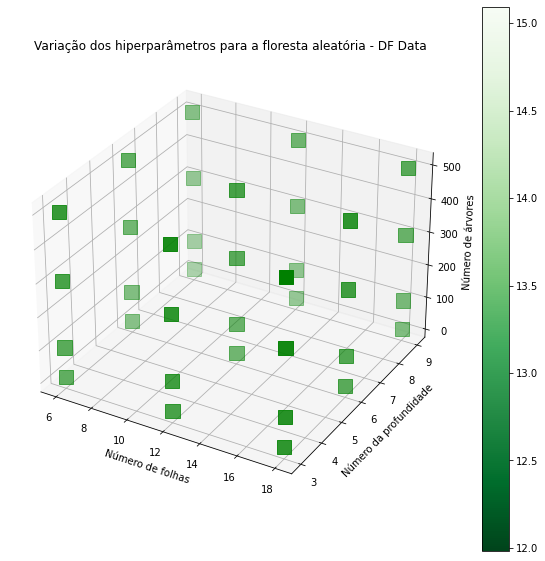

In [56]:
# %matplotlib
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
  
x = df_params_data_rf['Folhas']
y = df_params_data_rf['Profundidade']
z = df_params_data_rf['Árvores']
colo = df_params_data_rf['RMSE']
  
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
color_map = cm.ScalarMappable(cmap=cm.Greens_r)
color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x, y, z, marker='s',
                 s=200, color='green')
plt.colorbar(color_map)
  
# adding title and labels
ax.set_title("Variação dos hiperparâmetros para a floresta aleatória - DF Data")
ax.set_xlabel('Número de folhas')
ax.set_ylabel('Número da profundidade')
ax.set_zlabel('Número de árvores')
  
# displaying plot
plt.show()

Assim como é possível observar no heatmap 3D, quanto maior é o número de folhas e de árvores, e menor a profundidade, menor é o RMSE, ou seja, um melhor resultado é apresentado. Em contrapartida, quanto maior o número da profundidade, mais impreciso é o RMSE.

#

In [57]:
TAMANHO_TESTE_art = 10
SEMENTE_ALEATORIA_art = 777
FEATURES_art = df_data_art.columns.values[4:]
TARGET_art = ["Idade"]

indices_data_art = df_data_art.index
indices_treino_data_art, indices_teste_data_art = train_test_split(
    indices_data_art, test_size=TAMANHO_TESTE_art, random_state=SEMENTE_ALEATORIA_art
)

df_treino_data_art = df_data_art.loc[indices_treino_data_art]
df_teste_data_art = df_data_art.loc[indices_teste_data_art]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data_art = df_treino_data_art.reindex(FEATURES_art, axis=1).values
y_treino_data_art = df_treino_data_art.reindex(TARGET_art, axis=1).values
X_teste_data_art = df_teste_data_art.reindex(FEATURES_art, axis=1).values
y_teste_data_art = df_teste_data_art.reindex(TARGET_art, axis=1).values

In [58]:
from sklearn.ensemble import RandomForestRegressor

# alterando o formato do target
print(y_treino_data_art.shape, y_teste_data_art.shape)
y_treino_data_art = y_treino_data_art.ravel()
y_teste_data_art = y_teste_data_art.ravel()
print(y_treino_data_art.shape, y_teste_data_art.shape)

# cria o modelo
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino_data_art, y_treino_data_art)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste_data_art)
print()
print(previsao)

(100, 1) (10, 1)
(100,) (10,)

[49.1  55.11 51.1  49.49 51.7  52.22 49.15 51.52 46.69 52.98]


- Testando para o dataframe do arquivo ***"data_artigo.csv"***:

In [59]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste_data_art
y_previsao = modelo_rf.predict(X_teste_data_art)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} anos.")

O RMSE do modelo árvore de decisão foi de 9.026516493088572 anos.


**Alteração dos Hiperparâmetros**

Usando os mesmos conceitos apresentados anteriormente, temos:

In [60]:
from itertools import product

NUM_ARVORES = [10, 100, 300, 500]
NUM_FOLHAS = [None, 6, 12, 18]
NUM_PROFUNDIDADE = [None, 3, 6, 9]

data = []

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_data, y_treino_data)

    y_verdadeiro = y_teste_data
    y_previsao = modelo_rf.predict(X_teste_data)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    '''
    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} anos."
    )
    '''
    
    data.append([n_folhas,n_profundidade,n_arvores,RMSE])

In [61]:
df_params_data_art_rf = pd.DataFrame(data,columns=['Folhas','Profundidade','Árvores','RMSE'])

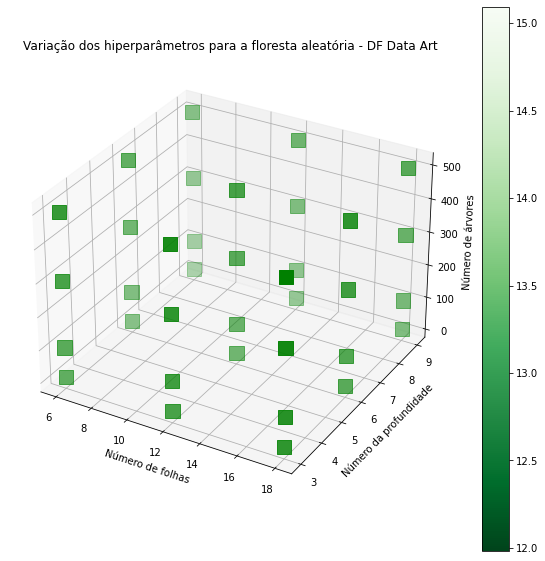

In [62]:
# %matplotlib
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
  
x = df_params_data_art_rf['Folhas']
y = df_params_data_art_rf['Profundidade']
z = df_params_data_art_rf['Árvores']
colo = df_params_data_rf['RMSE']
  
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
  
color_map = cm.ScalarMappable(cmap=cm.Greens_r)
color_map.set_array(colo)
  
# creating the heatmap
img = ax.scatter(x, y, z, marker='s',
                 s=200, color='green')
plt.colorbar(color_map)
  
# adding title and labels
ax.set_title("Variação dos hiperparâmetros para a floresta aleatória - DF Data Art")
ax.set_xlabel('Número de folhas')
ax.set_ylabel('Número da profundidade')
ax.set_zlabel('Número de árvores')
  
# displaying plot
plt.show()

Tal como pôde ser observado para o heatmap anterior, o menor RMSE será aquele com maior quantidade de folhas e árvores, com a menor profundidade possível.

#

#### Medição da importância das features

- Testando para o dataframe do arquivo ***"data.csv"***:

In [63]:
X_treino_data.shape,y_treino_data.shape

((100, 20), (100,))

In [64]:
N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino_data, y_treino_data.flatten())

RandomForestRegressor(n_estimators=50, n_jobs=4, random_state=666)

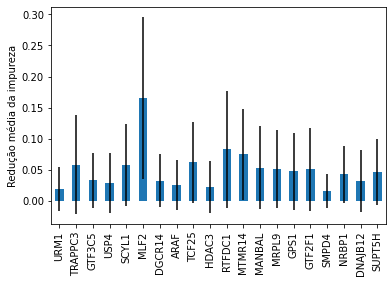

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

In [66]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino_data
y_local = y_treino_data

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9924330782290715

MLF2    0.009 +/- 0.001
RTFDC1  0.005 +/- 0.001
SCYL1   0.004 +/- 0.000
MANBAL  0.004 +/- 0.000
MTMR14  0.003 +/- 0.000
GTF2F1  0.003 +/- 0.001
SUPT5H  0.003 +/- 0.000
TRAPPC3 0.003 +/- 0.000
GPS1    0.002 +/- 0.000
TCF25   0.002 +/- 0.000
NRBP1   0.002 +/- 0.000
MRPL9   0.002 +/- 0.000
DGCR14  0.001 +/- 0.000
ARAF    0.001 +/- 0.000
USP4    0.001 +/- 0.000
GTF3C5  0.001 +/- 0.000
DNAJB12 0.001 +/- 0.000
HDAC3   0.001 +/- 0.000
URM1    0.000 +/- 0.000
SMPD4   0.000 +/- 0.000


- Testando para o dataframe do arquivo ***"data_artigo.csv"***:

In [67]:
N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino_data_art, y_treino_data_art)

RandomForestRegressor(n_estimators=50, n_jobs=4, random_state=666)

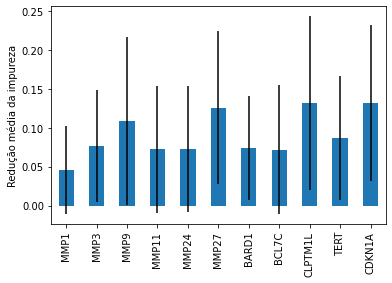

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES_art)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

In [69]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10


def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = X_treino_data_art
y_local = y_treino_data_art

R2 = R2_1param(modelo_rf, X_local, y_local)
print(f"O R^2 da previsão é de {R2}")

# Aqui que calculamos a importância das features
r = permutation_importance(
    modelo_rf,
    X_local,
    y_local,
    n_repeats=N_REPETICOES,
    random_state=SEMENTE_ALEATORIA,
    scoring=R2_1param,
)

print()

# Aqui nós exibimos os resultados obtidos
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{FEATURES_art[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

O R^2 da previsão é de 0.9937374816962239

CDKN1A  0.006 +/- 0.001
MMP9    0.006 +/- 0.001
CLPTM1L 0.006 +/- 0.001
MMP27   0.005 +/- 0.001
TERT    0.004 +/- 0.000
BARD1   0.004 +/- 0.001
MMP11   0.003 +/- 0.000
MMP3    0.003 +/- 0.000
MMP24   0.003 +/- 0.000
BCL7C   0.003 +/- 0.000
MMP1    0.002 +/- 0.000


A partir da métrica, é possível observar que os genes não apresentam uma boa previsibilidade, ao contrário do que se era esperado pela literatura. Uma hipótese levantada é a de que, quando analisados individualmente, não são suficientes para realizar previsões da idade.

#

### Análise da relevância dos atributos

Uma vez que o algoritmo foi aplicado, é essencial observar quais os hiperparâmetros mais adequados para a análise, e, uma vez que foi criado um dataframe que dispõe a relação da variação com os respectivos valores de RMSE, é mostrado abaixo os menores e maiores valores para as duas bases de dados.

In [70]:
print(f'Maior valor de RMSE para o df data é {round(df_params_data_rf["RMSE"].max(),2)}',
     f'e o menor valor é {round(df_params_data_rf["RMSE"].min(),2)}')
print(f'Maior valor de RMSE para o df data art é {round(df_params_data_art_rf["RMSE"].max(),2)}',
     f'e o menor valor é {round(df_params_data_art_rf["RMSE"].min(),2)}')

Maior valor de RMSE para o df data é 15.09 e o menor valor é 11.98
Maior valor de RMSE para o df data art é 15.09 e o menor valor é 11.98


Uma vez que já conhecemos os menores e maiores valores de RMSE, podemos buscar são os valores dos parâmetros que maximizam e minimizam o erro.

In [71]:
print('Df data\nMáximo\n',
      df_params_data_rf[df_params_data_rf.RMSE == df_params_data_rf.RMSE.max()],'\n\nMínimo\n',
      df_params_data_rf[df_params_data_rf.RMSE == df_params_data_rf.RMSE.min()])

print('\n')

print('Df data art\nMáximo\n',
      df_params_data_art_rf[df_params_data_art_rf.RMSE == df_params_data_art_rf.RMSE.max()],'\n\nMínimo\n',
      df_params_data_art_rf[df_params_data_art_rf.RMSE == df_params_data_art_rf.RMSE.min()])

Df data
Máximo
    Folhas  Profundidade  Árvores      RMSE
0     NaN           NaN       10  15.09321 

Mínimo
     Folhas  Profundidade  Árvores      RMSE
23     6.0           3.0      500  11.98421


Df data art
Máximo
    Folhas  Profundidade  Árvores      RMSE
0     NaN           NaN       10  15.09321 

Mínimo
     Folhas  Profundidade  Árvores      RMSE
23     6.0           3.0      500  11.98421


De maneira similar a observada pelo plot 3D, é possível observar que os melhores resultados realmente são com valores baixos de profundidade, mas não nulos, ao passo que que um baixo número de folhas e um número relativamente alto de árvores é melhor.

---

### <a id="comparacao"> Tarefa 6 - Comparação de Desempenho

[Voltar para o sumário](#sum)

Com todos os algoritmos devidamente testados e analisados por nós, utilizando ambos os *datasets* com os dados refentes às informações contidas nos arquivos ***"data_csv"*** e ***"data_artigo.csv"***, levando em consideração os melhores valores de RMSE (raiz quadrada do erro quadrático médio (root mean squared error)) obtidos pela aplicação de cada método, fomos capazes de elaborar a tabela abaixo:

| Base de dados| k-NN | Regressão Linear | Árvore de Decisão | Floresta Aleatória |
| :----------- | ---------: | ----------: | -----------: | -----------: |
| Data | 13.60 | 17.66 | 9.90 | 11.12 |
| Data Artigo | 9.49 | 9.49 | 9.82 | 11.12 |

Os valores de RMSE foram utilizados como métrica e como critério comparativo pois, assim como previamente estabelecido no notebook, é um ótimo método para determinar a eficácia do algoritmo, sendo que quanto menor o valor, melhor a eficiência, já que implicará em uma menor margem de erro média a cada previsão. Destarte, após a análise de tais valores, podemos inferir que, até o momento, o método de <u>árvore de decisão</u> aparenta ser o mais efetivo e recomendado dado os parâmetros dos nossos dados, o nosso target, e nossa interpretação, seguido pelo método de <u>floresta aleatória</u>, depois pelo <u>k-NN</u>, e por final a <u>regressão linear</u>, que se mostra como o pior modelo para nosso dataset.

---

### <a id="class"> Tarefa 7 - Classificação

[Voltar para o sumário](#sum)

In [72]:
# Treinando os classificadores, mas para todos os algoritmos

1. CLASSIFICAÇÕES PARA O DF_DATA
<br> **Informação importante**: nesse ponto, as análises serão feitas apenas com base na acurácia. Outras métricas serão usadas apenas posteriormente.
> *Classificação com k-NN para o df_data*

In [73]:
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 666
FEATURES = df_data.columns.values[4:]
TARGET = ["Categoria Idade"]

indices = df_data.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_data_treino = df_data.loc[indices_treino]
df_data_teste = df_data.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino_data = df_data_treino.reindex(FEATURES, axis=1).values
y_treino_data = df_data_treino.reindex(TARGET, axis=1).values.ravel()
X_teste_data = df_data_teste.reindex(FEATURES, axis=1).values
y_teste_data = df_data_teste.reindex(TARGET, axis=1).values.ravel()

Agora para treinar o classificador:

In [74]:
from sklearn.neighbors import KNeighborsClassifier

# para criar e treinar o modelo
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_treino_data, y_treino_data)

# para realizar uma previsão usando o modelo treinado
previsao_knndata = modelo_knn.predict(X_teste_data)
print(previsao_knndata)

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']


In [75]:
# para fazer análises métricas, não temos mais a opção de RMSE para dados categóricos
# mas temos outros métodos

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_knndata))
print('A acurácia do método de k-NN para o data set com os dados estatísticos é:', metrics.accuracy_score(y_teste_data, previsao_knndata))
      
# esse novo modelo permite analisar quantas vezes o modelo acertou a categoria de idade

Accuracy: 0.5454545454545454
A acurácia do método de k-NN para o data set com os dados estatísticos é: 0.5454545454545454


<br>Uma acurácia muito boa seria de 85% (segundo a aula teórica);
<br>Uma acurácia razoável seria de 75% (segundo a aula teórica);
<br>Com base nisso, nossa acurácia de 54,5% é pior que razoável então (também conhecida como ruim).

> *Classificação com Árvore de Decisão para o df_data*

In [76]:
from sklearn.tree import DecisionTreeClassifier

# cria e treina o modelo
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA) # criação
modelo_dt.fit(X_treino_data, y_treino_data) # treinamento

# realiza uma previsão usando o modelo treinado
previsao_dtdata = modelo_dt.predict(X_teste_data)
print(previsao_dtdata)

['Adulto' 'Jovem' 'Idoso' 'Adulto' 'Idoso' 'Idoso' 'Adulto' 'Adulto'
 'Adulto' 'Jovem' 'Idoso']


In [77]:
# vamos analisar a acurácia do modelo de decision tree right now

print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_dtdata))
print('A acurácia do método de DT para o data set com os dados estatísticos é:', metrics.accuracy_score(y_teste_data, previsao_dtdata))

Accuracy: 0.5454545454545454
A acurácia do método de DT para o data set com os dados estatísticos é: 0.5454545454545454


<br>Uma acurácia muito boa seria de 85%;
<br>Uma acurácia razoável seria de 75%;
<br>Com base nisso, nossa acurácia de 54,5% é pior que razoável então (também conhecida como ruim).
<br>Obtivemos, novamente, 54,5% de acurácia. Que seria, de acordo com os padrões utilizados aqui, ruim.

> *Classificação com Floresta de Decisão para o df_data*

In [78]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA) # criação
modelo_rf.fit(X_treino_data, y_treino_data) # treinamento
previsao_fcdata = modelo_rf.predict(X_teste_data) # previsão

print(previsao_fcdata)

['Adulto' 'Jovem' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Jovem' 'Adulto']


In [79]:
# vamos analisar a acurácia do modelo de forest classifier right now

print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_fcdata))
print('A acurácia do método de DT para o data set com os dados estatísticos é:', metrics.accuracy_score(y_teste_data, previsao_fcdata))

Accuracy: 0.7272727272727273
A acurácia do método de DT para o data set com os dados estatísticos é: 0.7272727272727273


<br>Uma acurácia muito boa seria de 85%;
<br>Uma acurácia razoável seria de 75%;
<br>k-NN: Com base nisso, nossa acurácia de 54,5% é pior que razoável então (também conhecida como ruim).
<br>DT: Obtivemos, novamente, 54,5% de acurácia. Que seria, de acordo com os padrões utilizados aqui, ruim.
<br>FC: acurácia de 72,7%. Até o momento, foi o nosso melhor resultado. Se aproxima de razoável.

> Em suma, Árvore de Decisão e k-NN nos ofereceram os mesmos resultados (54,5% de acurária) e os dois foram ruins. Todavia, Floresta de Decisão nos ofereceu um resultado melhor: 72.7% de acurácia, sendo ele então o melhor algoritmo para lidar com os dados do data set 'data.csv'.

<hr>

1. CLASSIFICAÇÕES PARA O DF_DATA_ART 
<br>Observação: (dados de artigo)

In [80]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 777
FEATURES = df_data_art.columns.values[4:]
TARGET = ["Categoria Idade"]

indices = df_data_art.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_data_art_treino = df_data_art.loc[indices_treino]
df_data_art_teste = df_data_art.loc[indices_teste]

# .values aqui pois queremos apenas os valores
X_treino_data_art = df_data_art_treino.reindex(FEATURES, axis=1).values
y_treino_data_art = df_data_art_treino.reindex(TARGET, axis=1).values.ravel()
X_teste_data_art = df_data_art_teste.reindex(FEATURES, axis=1).values
y_teste_data_art = df_data_art_teste.reindex(TARGET, axis=1).values.ravel()

> *Classificação com k-NN para o df_data_art*

In [81]:
# treinando o classificador

# para criar e treinar o modelo
modelo_art_knn = KNeighborsClassifier()
modelo_art_knn.fit(X_treino_data_art, y_treino_data_art)

# para realizar uma previsão usando o modelo treinado
previsao_knndata_art = modelo_art_knn.predict(X_teste_data_art)
print(previsao_knndata_art)
print()

# testando a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_knndata_art))
print('A acurácia do método de k-NN para o data set com os dados do artigo é:', metrics.accuracy_score(y_teste_data_art, previsao_knndata_art))

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.8181818181818182
A acurácia do método de k-NN para o data set com os dados do artigo é: 0.8181818181818182


<br>Uma acurácia muito boa seria de 85%;
<br>Uma acurácia razoável seria de 75%;
<br>Com base nisso, nossa acurácia de 81,8% se aproxima de muito boa;

> *Classificação com Árvore de Decisão para o df_data_art*

In [82]:
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA) # criação do modelo
modelo_dt.fit(X_treino_data_art, y_treino_data_art) # treinamento do modelo
previsao_dtdata_art = modelo_dt.predict(X_teste_data_art) # previsão com o modelo
print(previsao_dtdata_art)

['Jovem' 'Adulto' 'Adulto' 'Adulto' 'Idoso' 'Adulto' 'Jovem' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']


In [83]:
# testando a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_dtdata_art))
print('A acurácia do método de DT para o data set com os dados do artigo é:', metrics.accuracy_score(y_teste_data_art, previsao_dtdata_art))

Accuracy: 0.5454545454545454
A acurácia do método de DT para o data set com os dados do artigo é: 0.5454545454545454


<br>Uma acurácia muito boa seria de 85%;
<br>Uma acurácia razoável seria de 75%;
<br>Com base nisso, nossa acurácia de 81,8% se aproxima de muito boa;
<br> Uma acurácia de 54,5% é ruim;

> *Classificação com Floresta de Decisão para o df_data_art*

In [84]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA) # criação
modelo_rf.fit(X_treino_data_art, y_treino_data_art) # treinamento
previsao_fcdata_art = modelo_rf.predict(X_teste_data_art) # previsão

print(previsao_fcdata_art)

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Idoso' 'Adulto' 'Adulto']


In [85]:
# conferindo a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_fcdata_art))
print('A acurácia do método de k-NN para o data set com os dados do artigo é:', metrics.accuracy_score(y_teste_data_art, previsao_fcdata_art))

Accuracy: 0.7272727272727273
A acurácia do método de k-NN para o data set com os dados do artigo é: 0.7272727272727273


<br>Uma acurácia muito boa seria de 85%;
<br>Uma acurácia razoável seria de 75%;
<br>k-NN: Com base nisso, nossa acurácia de 81,8% se aproxima de muito boa;
<br>DT: Uma acurácia de 54,5% é ruim;
<br>FC: Uma acurácia de 72,7% é razoável.

> Em suma, considerando a manipulação dos dados provenientes de artigos sob uma análise por meio da classificação (que trabalha com categorias), temos que: a acurácia do modelo de k-NN é a melhor; a acurácia do método de Floresta de Decisões (81,8%) é intermediária (72,7%) e a acurácia do método de Árvores de Decisão é a pior (54,5%).

**Resumo: Visão geral**

> Considerando DF_DATA, as análises de classificação, com qualquer um dos três modelos possíveis, não foram satisfatórias. O máximo de acurácia que chegamos pode ser classificada como razoável e corresponde à 72,7%. Por outro lado, na análise de DF_DATA_ART, obtivemos valores mais satisfatórios,já que ele é classificados como muito bons e corresponde à 81,8% (k-NN). 

> <br>Pensando nas análises dos dois data_sets conjuntamente, sabemos que: 
- Para o df_data, o melhor algoritmo foi 'Floresta de Decisão', que atingiu acurácia de aproximadamente 73%.
- Para o df_data_art, o melhor algoritmo foi 'k-NN', que atingiu acurácia de aproximadamente 82%.
- Com base nisso, vamos fazer os próximos passos com o modelo de algoritmo k-nn, e temos justificativas para tanto:
1. Método que apresentou melhor resultado: muito bom;
2. Pretendemos trabalhar, futuramente, com foco mais voltado para o df_data_art. Nesse sentido, trabalharemos com o algoritmo que melhor se comportou nesse contexto.

<hr>

##### Trabalhando com hiperparâmetros e o modelo de k-NN selecionado
Instrução: usar data set de treino

**Anotações relevantes sobre classificação e algoritmos:**
<br> *Para k-nn vizinhos*
<br>Link: https://www.youtube.com/watch?v=4Dpf76AB9Js
> Só faz classificação com variáveis numéricas, não faz com variáveis de textos;
> <br> Usar, preferencialmente, valores ímpares;
> <br> Usar números pequenos não é uma estratégia boa;

> df_data

In [86]:
#data
NUM_VIZINHOS = [1, 3, 5, 11, 23, 35, 47, 59, 71]

for n in NUM_VIZINHOS:   
    modelo_hknn = KNeighborsClassifier(n_neighbors=n)
    modelo_hknn.fit(X_treino_data, y_treino_data)

    #previsão
    previsao_hknndata = modelo_hknn.predict(X_teste_data)
    print(previsao_hknndata)
    print()
    
    # testando a acurácia do modelo
    print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_hknndata))
    print(f'A acurácia do método de k-NN com n = {n} para o data set com os dados do artigo é:', metrics.accuracy_score(y_teste_data, previsao_hknndata))
    print()

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Idoso' 'Adulto' 'Adulto'
 'Idoso' 'Adulto' 'Adulto']

Accuracy: 0.36363636363636365
A acurácia do método de k-NN com n = 1 para o data set com os dados do artigo é: 0.36363636363636365

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Idoso'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.45454545454545453
A acurácia do método de k-NN com n = 3 para o data set com os dados do artigo é: 0.45454545454545453

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.5454545454545454
A acurácia do método de k-NN com n = 5 para o data set com os dados do artigo é: 0.5454545454545454

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.5454545454545454
A acurácia do método de k-NN com n = 11 para o data set com os dados do artigo é: 0.5454545454545454

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'A

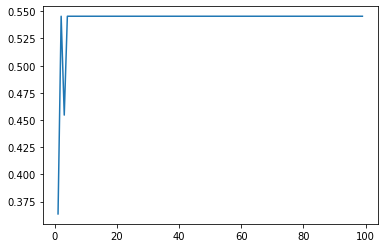

In [87]:
num_vizinhos = [i for i in range(1,100)]
# agora, vamos trabalhar com todos os n entre 1 e 100 como possíveis valores de hiperparâmetros

accuracys_data = []
# vamos analisar todos os valores de acurácia para cada um dos números de vizinhos
# assim como feito nas células anteriores
# os valores de acurácia serão armazenados nessa lista 

# para cada possível valor de vizinhos, vamos refazer o mesmo processo já observado anteriormente, criar e testar o modelo e prever
for i in num_vizinhos:
    model = KNeighborsClassifier(n_neighbors=i)     
    model.fit(X_treino_data, y_treino_data)    
    prevision = model.predict(X_teste_data)
    
 # reunindo os valores de acurácia dentro da lista   
    accuracy = metrics.accuracy_score(y_teste_data, prevision)
    accuracys_data.append(accuracy)

# plotar acurácia em função do número de vizinhos 
import matplotlib.pyplot as plt
plt.plot(num_vizinhos, accuracys_data)

In [88]:
print(accuracys_data)
# conferindo os valores de acurácia

[0.36363636363636365, 0.5454545454545454, 0.45454545454545453, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.545454545454545

> *data_art*

In [89]:
#data_art
NUM_VIZINHOS = [1, 3, 5, 11, 23, 35, 47, 59, 71]

for n in NUM_VIZINHOS:
    modelo_art_hknn = KNeighborsClassifier(n_neighbors=n)
    modelo_art_hknn.fit(X_treino_data_art, y_treino_data_art)

    #previsão
    previsao_hknndata_art = modelo_art_hknn.predict(X_teste_data_art)
    print(previsao_hknndata_art)
    print()
    
    # testando a acurácia do modelo
    print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_hknndata_art))
    print(f'A acurácia do método de k-NN para n = {n} o data set com os dados do artigo é:', metrics.accuracy_score(y_teste_data_art, previsao_hknndata_art))
    print()

['Adulto' 'Idoso' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Idoso' 'Idoso'
 'Jovem' 'Adulto' 'Idoso']

Accuracy: 0.36363636363636365
A acurácia do método de k-NN para n = 1 o data set com os dados do artigo é: 0.36363636363636365

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Idoso' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.7272727272727273
A acurácia do método de k-NN para n = 3 o data set com os dados do artigo é: 0.7272727272727273

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.8181818181818182
A acurácia do método de k-NN para n = 5 o data set com os dados do artigo é: 0.8181818181818182

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.8181818181818182
A acurácia do método de k-NN para n = 11 o data set com os dados do artigo é: 0.8181818181818182

['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adu

> Defini 8 possíveis valores para os hiperparâmetros. 
> <br>Joia. 
> <br>Mas todos os meus resultados foram exatamente iguais??? Sim, confirmamos depois pelos gráficos.
> <br>Mexer com hiperparâmetros em classificação não faz diferença? Essa é uma boa pergunta para se discutir em grupo.

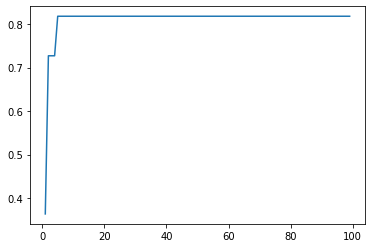

In [90]:
numero = [i for i in range(1,100)]

accuracia_data_art = []
for i in numero:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_treino_data_art, y_treino_data_art)
    previsao = model.predict(X_teste_data_art)
    
# testando todas as acurácias e reunindo elas
    accuracia = metrics.accuracy_score(y_teste_data_art, previsao)
    accuracia_data_art.append(accuracia)

# plotando
import matplotlib.pyplot as plt
plt.plot(numero, accuracia_data_art)

In [91]:
print(accuracia_data_art)

[0.36363636363636365, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182

**EXTRA: Avaliação automática de hiperparâmetros**
<br> *Link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html*

> *Para df_data*

In [92]:
from sklearn.model_selection import GridSearchCV

# selecionar os hiperparâmetros que podem ser variados para o k-nn
#param_grid = { 
   # 'n_estimators': [200, 300, 400, 500, 600],  # apenas de referência
#}

#CV_rfc = GridSearchCV(estimator=modelo_hknn, param_grid=param_grid, cv= 5, n_jobs=8)
#CV_rfc.fit(X_treino_data, y_treino_data)

> *Para df_data_art*

In [93]:
# hiperparâmtros para k-nn
#param_grid = { 
    #'n_estimators': [200, 300, 400, 500, 600], #referencia solely
#}
#CV_rfc = GridSearchCV(estimator=modelo_art_hknn, param_grid=param_grid, cv= 5, n_jobs=8)
#CV_rfc.fit(X_treino_data_art, y_treino_data_art)

<hr>

##### Avaliando o desempenho do modelo

<br>Tarefas:
<br>Avalie o desempenho do seu modelo
- Utilize os datasets de treino e teste para avaliar
- Compare com seu modelo baseline
- Observe a matriz de confusão do seu modelo
- Métricas sugeridas: precisão, revocação, acurácia

*Além de **acurácia**, vamos avaliar aqui também outras métricas, sendo elas:*
- Precisão
- Revocação
- Matriz de confusão 

***Conceitos** importantes:*
<br> Precisão:"dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas";
<br> Revocação: "dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas";
<br> Matriz de confusão: "Uma matriz de confusão é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado (ou etiquetas/labels)"

<br>**Fontes**: https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

> *df_data (comparação classificador: baseline X k-nn)*

In [94]:
# MODELO BASELINE

from sklearn.dummy import DummyClassifier

# criar, treinar, prever
modelo_cbaseline = DummyClassifier()
modelo_cbaseline.fit(X_treino_data, y_treino_data)

previsao_cb = modelo_cbaseline.predict(X_teste_data)
print('A previsão é:', previsao_cb)
print()

# valores de acurácia do modelo para baseline
print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_cb))
print('A acurácia da previsão em classificação para o baseline do data set data é:', metrics.accuracy_score(y_teste_data, previsao_cb))

print()

# precisão 
print("Precision:",metrics.precision_score(y_teste_data, previsao_cb, average='weighted'))
print('A precisão do método de k-NN para o data set data é:', metrics.precision_score(y_teste_data, previsao_cb, average='weighted'))

# revocação (sensibilidade)

A previsão é: ['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.5454545454545454
A acurácia da previsão em classificação para o baseline do data set data é: 0.5454545454545454

Precision: 0.29752066115702475
A precisão do método de k-NN para o data set data é: 0.29752066115702475


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão para o Dummy Classifier no data set `data`:

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste_data, previsao_cb)

array([[6, 0, 0],
       [2, 0, 0],
       [3, 0, 0]], dtype=int64)

In [96]:
# MODELO K-NN

# retomada da acurácia
print("Accuracy:",metrics.accuracy_score(y_teste_data, previsao_knndata))
print('A acurácia do método de k-NN para o data set data é:', metrics.accuracy_score(y_teste_data, previsao_knndata))

print()

# precisão
print("Precision:",metrics.precision_score(y_teste_data, previsao_knndata, average='weighted'))
print('A precisão do método de k-NN para o data set data é:', metrics.precision_score(y_teste_data, previsao_knndata, average='weighted'))

# revocação

Accuracy: 0.5454545454545454
A acurácia do método de k-NN para o data set data é: 0.5454545454545454

Precision: 0.29752066115702475
A precisão do método de k-NN para o data set data é: 0.29752066115702475


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão para o kNN Classifier no data set `data`:

In [97]:
confusion_matrix(y_teste_data, previsao_knndata)

array([[6, 0, 0],
       [2, 0, 0],
       [3, 0, 0]], dtype=int64)

> *df_data_art (comparação classificador: baseline X k-nn)*

In [98]:
# com o baseline
# data set data_art

from sklearn.dummy import DummyClassifier

# criar, treinar, prever
modelo_cbaseline = DummyClassifier()
modelo_cbaseline.fit(X_treino_data_art, y_treino_data_art)

previsao_cb_art = modelo_cbaseline.predict(X_teste_data_art)
print('A previsão é:', previsao_cb_art)
print()

# acurácia
print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_cb))
print('A acurácia da previsão em classificação para o baseline do data set data é:', metrics.accuracy_score(y_teste_data_art, previsao_cb_art))

print()

# precisão
print("Precision:",metrics.precision_score(y_teste_data_art, previsao_cb, average='weighted'))
print('A precisão da previsão em classificação para o baseline do data set data é:', metrics.precision_score(y_teste_data_art, previsao_cb, average='weighted'))

# revocação (sensibilidade)

A previsão é: ['Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto' 'Adulto'
 'Adulto' 'Adulto' 'Adulto']

Accuracy: 0.8181818181818182
A acurácia da previsão em classificação para o baseline do data set data é: 0.8181818181818182

Precision: 0.6694214876033059
A precisão da previsão em classificação para o baseline do data set data é: 0.6694214876033059


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão para o Dummy Classifier no data set `data art`:

In [99]:
confusion_matrix(y_teste_data_art, previsao_cb)

array([[9, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

In [100]:
# retomando os resultados anteriores para k-NN
print("Accuracy:",metrics.accuracy_score(y_teste_data_art, previsao_knndata_art))
print('A acurácia do método de k-NN para o data set data é:', metrics.accuracy_score(y_teste_data_art, previsao_knndata_art))

print()

# precisão
print("Precision:",metrics.precision_score(y_teste_data_art, previsao_knndata_art, average='weighted'))
print('A precisão do método de k-NN para o data set data é:', metrics.precision_score(y_teste_data_art, previsao_knndata_art, average='weighted'))

# revocação (sensibilidade)

Accuracy: 0.8181818181818182
A acurácia do método de k-NN para o data set data é: 0.8181818181818182

Precision: 0.6694214876033059
A precisão do método de k-NN para o data set data é: 0.6694214876033059


c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\venv\ilumpy\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusão para o kNN Classifier no data set `data art`:

In [101]:
confusion_matrix(y_teste_data_art, previsao_knndata_art)

array([[9, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)